# Part 1: Analyze the network

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

The directed network is downloaded from a .graphml file.

In [2]:
G = nx.read_graphml("new_network/new_rock_artists.graphml")

> Present an analysis/description of the network of bands/artists using tools from Lecture 5. Imagine that you have been tasked with presenting the important facts about the network to an audience who knows about network science, but doesn't know about this particular network.

# 1. Qualitative Analysis

The analysis begins with qualitative aspects of the network, focusing on the in-degree, out-degree and total-degree of its nodes.

The **in-degree** of a node indicates how many artists mention that particular artist, reflecting their influence. The three artists with the highest in-degree are The Beatles, The Rolling Stones and Led Zeppelin, highly influential figures in rock music.

The **out-degree** of a node measures how many artists a node references. The artists with the highest out-degree are Alice in Chains, Deep Purple and Black Sabbath. By analysing their Wikipedia pages, their references are mostly bands that influenced them and vice versa or shared the same musical scene. These artists do not have a highly influential presence in the network but they contribute to its structure through their connections.

The **total-degree** of a node corresponds to the sum of their in and out degree, reflecting its overall connectivity. The artists with the highest total-degree are the same as the ones with highest in-degree, The Beatles, The Rolling Stones and Led Zeppelin, showing that being referenced by many others gives the node significance.

A scatter plot of in-degree versus out-degree shows that the majority of artists cluster near the origin, indicating low in-degree and low out-degree, while highly influential artists appear as outliers with very high in-degree but average out-degree.

In [3]:
#Highest in
in_degrees = dict(G.in_degree())
sorted_nodes_in = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)
highest_in=sorted_nodes_in[:3]
print("Highest in-degree nodes and their in-degree value:", highest_in)

#Highest out 
out_degrees = dict(G.out_degree())
sorted_nodes_out = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)
highest_out=sorted_nodes_out[:3]
print(" \nHighest out-degree nodes and their out-degree value:", highest_out)

#Highest total
total_degrees = dict(G.degree())
sorted_nodes_total = sorted(total_degrees.items(), key=lambda x: x[1], reverse=True)
highest_total=sorted_nodes_total[:3]
print("\nHighest total-degree nodes and their total-degree value:", highest_total)

Highest in-degree nodes and their in-degree value: [('the beatles', 171), ('the rolling stones', 122), ('led zeppelin', 119)]
 
Highest out-degree nodes and their out-degree value: [('alice in chains', 77), ('deep purple', 76), ('black sabbath', 64)]

Highest total-degree nodes and their total-degree value: [('the beatles', 200), ('the rolling stones', 156), ('led zeppelin', 154)]


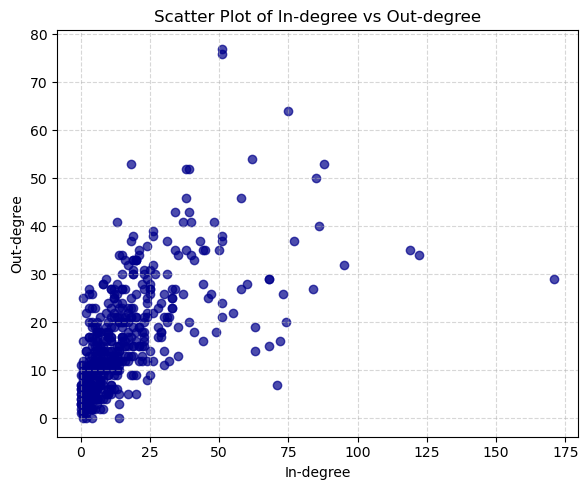

In [4]:
# in-degree and out-degree lists
in_d = [d for _, d in G.in_degree()]
out_d = [d for _, d in G.out_degree()]

plt.figure(figsize=(6, 5))
plt.scatter(in_d, out_d, marker='o', color='darkblue', alpha=0.7)
plt.title('Scatter Plot of In-degree vs Out-degree')
plt.xlabel('In-degree')
plt.ylabel('Out-degree')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Quantitative Analysis

A quantitative analysis is then conducted to examine degree distribution, centrality and assortativity.

## 2.1. Degree distributions

Since it is a directed network, analyzing the in-degree, out-degree, and total-degree distributions gives a more complete understanding of the network’s structure.

The **in-degree distribution**, $P(k_{in})$, gives the probability that a node has $k_{in}$ incoming links and reveals patterns of influence, while the **out-degree distribution**, $P(k_{out})$, gives the probability of a node having $k_{out}$  outgoing links. The **total degree distribution**, $P(k)$, combines these two and corresponds to the probability that a node has $k = k_{in} + k_{out}$ total connections in the network, representing a balance between influence and connectivity.

### 2.1.1. In-degree distribution

The histogram of the network’s in-degree distribution presents a heavy-tail, meaning most artists are mentioned on only a few other artists’ pages, while a small number of artists are referenced across many pages, consistent with the patterns observed in the previous scatter plot. On a log–log plot, the distribution declines almost linearly, indicating a possible power-law behavior.

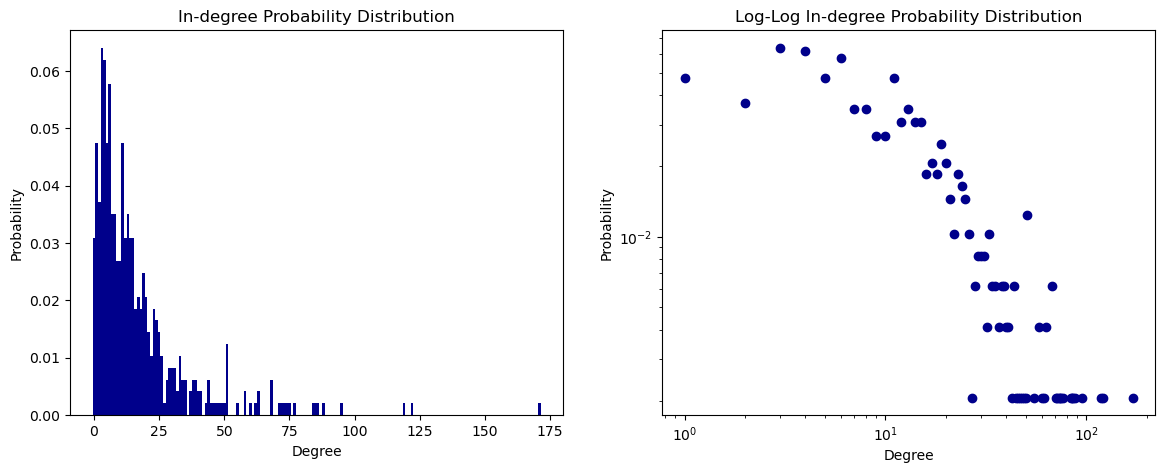

In [5]:
#in_d = [d for _, d in G.in_degree()]
in_d_sort = sorted(in_d)

max_in=max(in_d_sort)
min_in=min(in_d_sort)
v_in=np.arange(min_in, max_in+2)

# counts
in_counts, in_bins = np.histogram(in_d_sort, bins=v_in)

# probabilities
in_probs = in_counts / in_counts.sum()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(in_bins[:-1], in_probs, width=np.diff(in_bins), color='darkblue')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Probability')
axes[0].set_title('In-degree Probability Distribution')

axes[1].scatter(in_bins[:-1], in_probs, marker='o', color='darkblue')
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Probability')
axes[1].set_title('Log-Log In-degree Probability Distribution')
plt.show()

To investigate if the in-degree distribution follows a power law, its exponent was estimated using the `powerlaw` package. The result was approximately 2.7 for $x_{min}$ = 19, meaning that the power-law fit applies to degrees higher than 19. This confirms, once again, that the in-degree distribution is heavy-tailed, with its upper tail following a power-law pattern. An exponent between 2 and 3 indicates scale-free characteristics, where a few highly connected nodes, called hubs, play an important role in the network’s structure. In this context, while most artists are mentioned few times, artists with very high in-degrees correspond to influential figures. This observation aligns with the fact that the top 3 highest in-degree nodes are famous names in the rock world.

In [6]:
fit_in = powerlaw.Fit(in_d,discrete=True)
alpha_in = fit_in.alpha
xmin_in=fit_in.xmin
print("In-degree exponent (alpha):", alpha_in)
print("xmin:", xmin_in)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
In-degree exponent (alpha): 2.7123416618256444
xmin: 19.0


In order to check if the in-degree distribution could follow a different distribution, we compared power-law, log-normal and exponential distribution models. The log-normal distribution fits the data slightly better than the power-law and exponential, although the p-value suggests this is not strong. Overall, all three models display comparable plausibility, with no strong evidence favoring one distribution over the others.

In [7]:
R_ln_in, p_ln_in = fit_in.distribution_compare('power_law', 'lognormal')
print("Power-law vs lognormal: R =", R_ln_in, ", p =", p_ln_in)

R_exp_in, p_exp_in = fit_in.distribution_compare('power_law', 'exponential')
print("Power-law vs exponential: R =", R_exp_in, ", p =", p_exp_in)

R_expln_in, p_expln_in = fit_in.distribution_compare('lognormal', 'exponential')
print("Log-normal vs exponential: R =", R_expln_in, ", p =", p_expln_in)

Power-law vs lognormal: R = -3.429503097832927 , p = 0.0985283815914586
Power-law vs exponential: R = -0.4404399184426442 , p = 0.9278100416306371
Log-normal vs exponential: R = 2.989063179390289 , p = 0.30144117913571666


These distributions were plotted alongside the data for visual inspection of tail behaviour. The network shows heavy-tailed behavior that resembles a log-normal distribution. Being more similar to a log-normal distribution than to a power-law one means that the network has large hubs but they do not completly dominate the network, as it would be expected in a powerlaw. However, this resembling to a log-normal is not supported statistically. Overall, the heavy-tailed behaviour indicates that most nodes have low in-degrees, while a few hubs, the highly influential artists, present many connections.

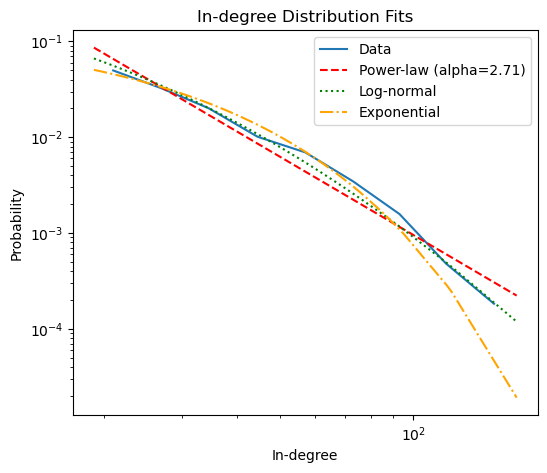

In [8]:
fig, ax = plt.subplots(figsize=(6,5))
fit_in.plot_pdf(label='Data')
fit_in.power_law.plot_pdf(color='red', linestyle='--', label=f'Power-law (alpha={alpha_in:.2f})')
fit_in.lognormal.plot_pdf(color='green', linestyle=':', label='Log-normal')
fit_in.exponential.plot_pdf(color='orange', linestyle='-.', label='Exponential')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('In-degree')
ax.set_ylabel('Probability')
ax.set_title('In-degree Distribution Fits')
ax.legend()
plt.show()

### 2.1.2. Out-degree distribution

The out-degree distribution is right-skewed and long-tailed, with most nodes having between 5 and 20 out going links and only a few exceeding 40. On the log–log plot, low out-degree nodes present a high probability, while higher out-degree nodes spread downward, showing decreasing probability for nodes with more out-links. Although a few hubs exist, the pattern does not seem to follow a power law.

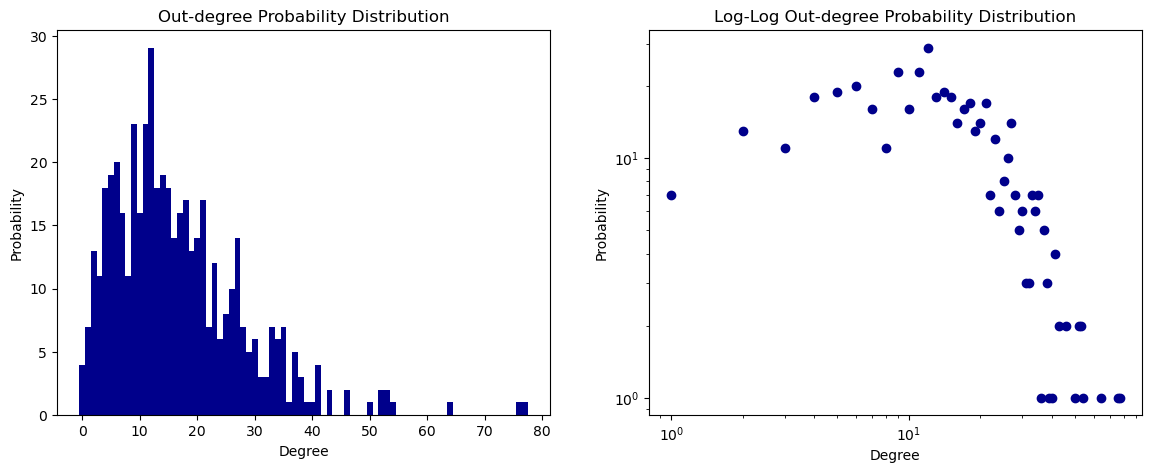

In [9]:
out_d_sort = sorted(out_d)

max_out=max(out_d_sort)
min_out=min(out_d_sort)
v_out=np.arange(min_out, max_out+2)

# counts
out_counts, out_bins = np.histogram(out_d_sort, bins=v_out)
# probabilities
out_probs = out_counts / out_counts.sum()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(out_bins[:-1], out_counts, width=np.diff(out_bins), color='darkblue')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Probability')
axes[0].set_title('Out-degree Probability Distribution')

axes[1].scatter(out_bins[:-1], out_counts, marker='o', color = 'darkblue')
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Probability')
axes[1].set_title('Log-Log Out-degree Probability Distribution')

plt.show()

The $x_{min}$ estimated with the `powerlaw` package supports that the out-degree distribution is not a power law, since its high value of 33 means the power-law model only applies to a small portion of the data. The exponent greater than 3 suggests the network does not exhibit scale-free behavior, meaning hubs are not that frequent, unlike the in-degree distribution. Once again, we compared different distributions but the data does not strongly favor any particular model. In general, very few nodes have a large number of outgoing links meaning the network is dominated by typical artists with few outgoing references.

In [10]:
fit_out = powerlaw.Fit(out_d,discrete=True)
alpha_out = fit_out.alpha
xmin_out=fit_out.xmin
print("In-degree exponent (alpha):", alpha_out)
print("xmin:", xmin_out)

Calculating best minimal value for power law fit
In-degree exponent (alpha): 5.830719630959893
xmin: 33.0


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [11]:
R_ln_out, p_ln_out = fit_out.distribution_compare('power_law', 'lognormal')
print("Power-law vs lognormal: R =", R_ln_out, ", p =", p_ln_out)

R_exp_out, p_exp_out = fit_out.distribution_compare('power_law', 'exponential')
print("Power-law vs exponential: R =", R_exp_out, ", p =", p_exp_out)

R_expln_out, p_expln_out = fit_out.distribution_compare('lognormal', 'exponential')
print("Log-normal vs exponential: R =", R_expln_out, ", p =", p_expln_out)

Power-law vs lognormal: R = 0.00042028205398869645 , p = 0.9731733439451171
Power-law vs exponential: R = 1.1946721301773109 , p = 0.2904683182203369
Log-normal vs exponential: R = 1.1942518481233222 , p = 0.2907290336350299


c:\Users\Maria\anaconda3\envs\sgi\Lib\site-packages\powerlaw.py:1570: RuntimeWarning: invalid value encountered in divide
  return likelihoods/norm


### 2.1.3. Total-degree distribution

The total degree distribution is right-skewed and reflects the combination of the in-degree and out-degree distributions. Its long tail can be explained by the in-degree component, while its body comes from the moderate-in and moderate-out degrees in both distributions. It indicates that most artists have relatively few total connections, while a small number of artists have extremely high connectivity, suggesting the presence of hubs, as seen in the previous analysis. The log–log version of the plot also suggest the existence of those hubs but not a power-law behaviour.

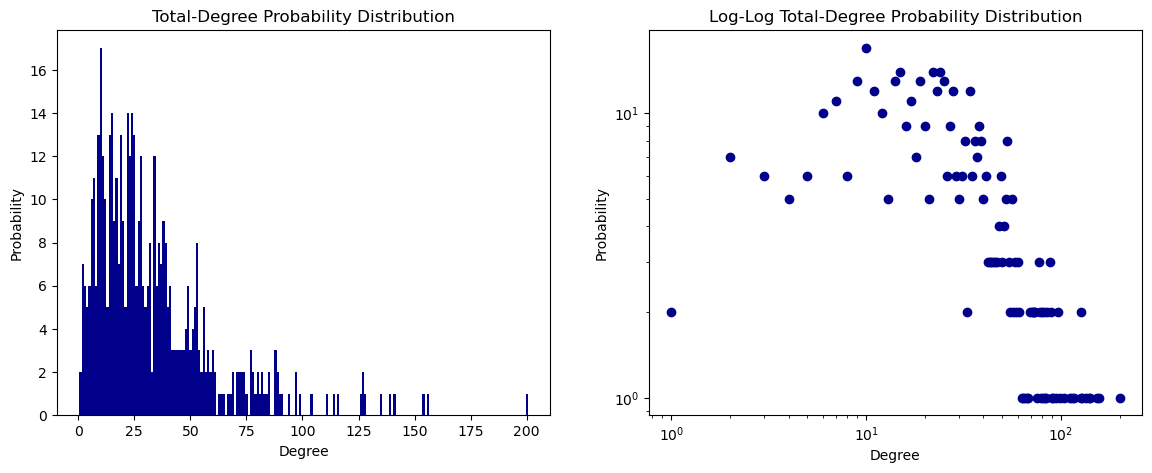

In [12]:
total_d = [d for _, d in G.degree()]
total_d_sort = sorted(total_d)

max_total=max(total_d_sort)
min_total=min(total_d_sort)
v_total=np.arange(min_total, max_total+2)

# counts
total_counts, total_bins = np.histogram(total_d_sort, bins=v_total)
# probabilities
total_probs = total_counts / total_counts.sum()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(total_bins[:-1], total_counts, width=np.diff(total_bins), color='darkblue')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Probability')
axes[0].set_title('Total-Degree Probability Distribution')
    
axes[1].scatter(total_bins[:-1], total_counts, marker='o', color = 'darkblue')
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Probability')
axes[1].set_title('Log-Log Total-Degree Probability Distribution')
plt.show()

From the exponent of the degree distribution and its $x_{min}$ we can conlude the distribution does not follow a power-law. Comparison between other models was also inconclusive.

In [13]:
fit_total = powerlaw.Fit(total_d,discrete=True)
alpha_total = fit_total.alpha
xmin_total = fit_total.xmin
print("In-degree exponent (alpha):", alpha_total)
print("xmin:", xmin_total)

Calculating best minimal value for power law fit
In-degree exponent (alpha): 4.504202887404322
xmin: 71.0


In [14]:
R_ln_out, p_ln_out = fit_total.distribution_compare('power_law', 'lognormal')
print("Power-law vs lognormal: R =", R_ln_out, ", p =", p_ln_out)

R_exp_out, p_exp_out = fit_total.distribution_compare('power_law', 'exponential')
print("Power-law vs exponential: R =", R_exp_out, ", p =", p_exp_out)

R_expln_out, p_expln_out = fit_total.distribution_compare('lognormal', 'exponential')
print("Log-normal vs exponential: R =", R_expln_out, ", p =", p_expln_out)

Power-law vs lognormal: R = -0.5704999260024266 , p = 0.4609841066210114
Power-law vs exponential: R = -0.5559020941103765 , p = 0.6469807719980458
Log-normal vs exponential: R = 0.014597831892050106 , p = 0.9740817764494625


### 2.1.4. Conclusions

Although no model was attributed to any of the distributions, their analysis revealed several important insights about the network. The presence of hubs was confirmed. These are artists that have significantly more connections than most artists, reflecting their strong influence within the rock world. It was also concluded that these artists' significance comes mostly from being referenced by many other artists. However, the majority of artists in the network are only rarely mentioned or reference others indicating limited influence and a non-central role in the network. In the end, the heavy-tail of the total-degree distribution reflects the real rock scene: some central figures dominate it, while most artists have smaller significance.

## 2.2. *Length-of-content* attribute

The *length-of-content* attribute represents the number of words in an artist’s Wikipedia page. The correlation between this attribute and a node’s out-degree is 0.665, indicating a positive relationship. The longer an artist’s page, the more artists are mentioned on it, which makes sense probabilistically. The correlation between *length-of-content* and in-degree is slightly higher at 0.669, suggesting that artists with longer pages also tend to be more influential. This is intuitive, since famous artists usually have more information written about them.

Pearson correlation (Out-Degree): 0.6651431236717017
Pearson correlation (In-Degree): 0.6695854698018071


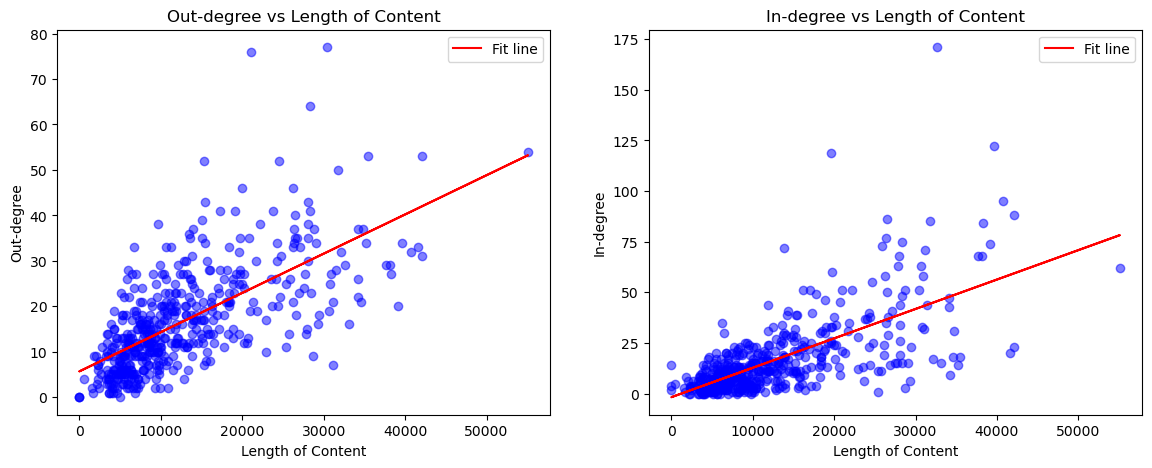

In [15]:
from scipy.stats import pearsonr

length_of_content = np.array(list(nx.get_node_attributes(G, 'length_of_content').values()))
out_degree = np.array(list(dict(G.out_degree()).values()))
in_degree = np.array(list(dict(G.in_degree()).values()))

pearson_out = pearsonr(length_of_content, out_degree)
pearson_in = pearsonr(length_of_content, in_degree)
print("Pearson correlation (Out-Degree):", pearson_out[0])
print("Pearson correlation (In-Degree):", pearson_in[0])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(length_of_content, out_degree, alpha=0.5, c='blue')
slope, intercept = np.polyfit(length_of_content, out_degree, 1)
axes[0].plot(length_of_content, slope * length_of_content + intercept, color='red', label='Fit line')
axes[0].set_title(f"Out-degree vs Length of Content")
axes[0].set_xlabel("Length of Content")
axes[0].set_ylabel("Out-degree")
axes[0].legend()

axes[1].scatter(length_of_content, in_degree, alpha=0.5, c='blue')
slope, intercept = np.polyfit(length_of_content, in_degree, 1)
axes[1].plot(length_of_content, slope * length_of_content + intercept, color='red', label='Fit line')
axes[1].set_title(f"In-degree vs Length of Content")
axes[1].set_xlabel("Length of Content")
axes[1].set_ylabel("In-degree")
axes[1].legend()
plt.show()

## 2.3. Centrality

Centrality measures the relative importance of nodes within a network, with different metrics capturing different aspects of that importance. We focus on three types: degree centrality, betweenness centrality and eigenvector centrality.

**In-degree and out-degree centrality** is calculated by normalizing the number of incoming or outgoing links for each node so nodes with more links are considered more central.

In [16]:
indegree_c = nx.in_degree_centrality(G)
sorted_in = sorted(indegree_c.items(), key=lambda x: x[1], reverse=True)
top5_in = [sorted_in[i][0] for i in range(5)]
print("Top 5 nodes by in-degree centrality:", top5_in)

outdegree_c = nx.out_degree_centrality(G)
sorted_out = sorted(outdegree_c.items(), key=lambda x: x[1], reverse=True)
top5_out = [sorted_out[i][0] for i in range(5)]
print("Top 5 nodes by out-degree centrality:", top5_out)

Top 5 nodes by in-degree centrality: ['the beatles', 'the rolling stones', 'led zeppelin', 'bob dylan', 'queen (band)']
Top 5 nodes by out-degree centrality: ['alice in chains', 'deep purple', 'black sabbath', "guns n' roses", 'queen (band)']


**Betweenness centrality** measures how often a node lies on the shortest paths between other nodes, identifying the ones that act as bridges in the network. In a rock artist network, these nodes can represent a connection between different scenes or genres, for example, by being popular in different movements. Interestingly, the top five artists with the highest betweenness centrality also rank highly in either in-degree or out-degree centrality, suggesting a relationship between the number of connections and a node’s role as a bridge. This indicates that the Beatles are not as prominent in connecting different parts of the network as they are influential, for example.

In [17]:
bet_c=nx.betweenness_centrality(G)
sorted_bet_c = sorted(bet_c.items(), key=lambda x: x[1], reverse=True)
bet_c5=[sorted_bet_c[i][0] for i in range(5)]
print("Top 5 nodes by betweenness centrality:",bet_c5)

Top 5 nodes by betweenness centrality: ['deep purple', 'queen (band)', 'the rolling stones', 'alice in chains', "guns n' roses"]


**Eigenvector centrality** assigns higher scores to nodes that are connected to other highly scored nodes. In-eigenvector centrality measures importance of a node based on the importance of nodes pointing to it. Nodes with high in-eigenvector centrality are referenced by other highly influential nodes. Out-eigenvector centrality measures a node’s importance based on the importance of nodes it points to. With this centrality measure, some different artists come up as The Who, Metallica and Megadeth, that might have fewer but more important connections than the top 5 artists of degree centrality.

In [18]:
ineig_c = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)
top5_in = sorted(ineig_c.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 in-eigenvector centrality:", [x[0] for x in top5_in])

outeig_c = nx.eigenvector_centrality(G.reverse(), max_iter=1000, tol=1e-06)
top5_out = sorted(outeig_c.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 out-eigenvector centrality:", [x[0] for x in top5_out])

Top 5 in-eigenvector centrality: ['the beatles', 'the rolling stones', 'led zeppelin', 'the who', 'bob dylan']
Top 5 out-eigenvector centrality: ['alice in chains', 'deep purple', 'black sabbath', 'metallica', 'megadeth']


### 2.3.1. Betweenness centrality vs degree centrality

Plotting betweenness centrality against in-degree centrality shows how a node’s role as a bridge relates to its influence in the network. The strong positive correlation of 0.832 indicates that nodes with higher betweenness centrality generally also have higher in-degree centrality. In this network, this suggests that artists who connect different parts of the network are often influential artists with many references.

Similarly, the correlation value is 0.752, slightly lower but still strong, indicating that artists who act as bridges often have high out-degree as well, though the relationship is less consistent than with in-degree.

Pearson correlation (In-Degree): 0.8320025215758797
Pearson correlation (Out-Degree): 0.7521478125219854


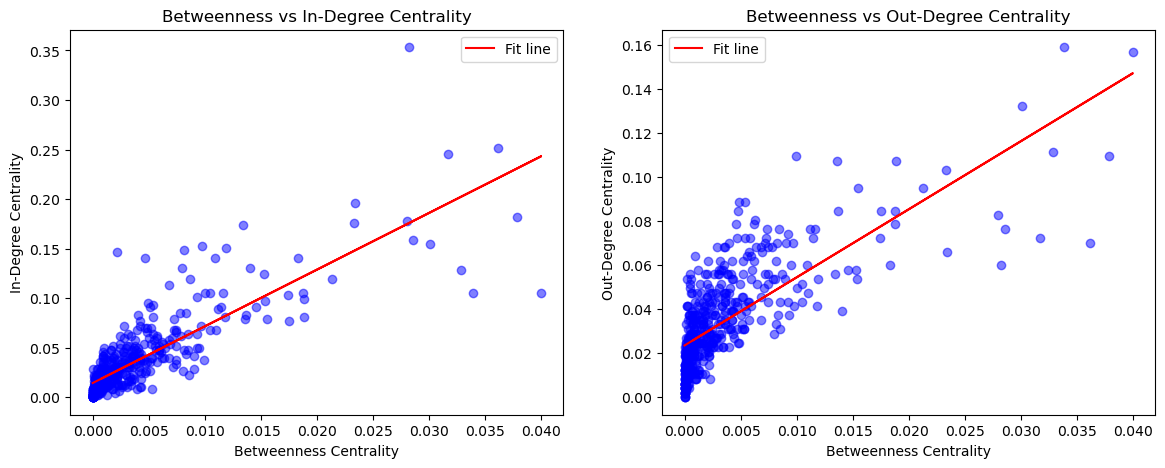

In [19]:
from scipy.stats import pearsonr

bet_c_list = list(bet_c.values())
indegree_c_list = list(indegree_c.values())
outdegree_c_list = list(outdegree_c.values())

pearson_corr_in = pearsonr(bet_c_list, indegree_c_list)
pearson_corr_out = pearsonr(bet_c_list, outdegree_c_list)
print("Pearson correlation (In-Degree):", pearson_corr_in[0])
print("Pearson correlation (Out-Degree):", pearson_corr_out[0])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(bet_c_list, indegree_c_list, alpha=0.5, c='blue')
slope, intercept = np.polyfit(bet_c_list, indegree_c_list, 1)
axes[0].plot(bet_c_list, slope * np.array(bet_c_list) + intercept, color='red', label='Fit line')
axes[0].set_title(f"Betweenness vs In-Degree Centrality")
axes[0].set_xlabel("Betweenness Centrality")
axes[0].set_ylabel("In-Degree Centrality")
axes[0].legend()

axes[1].scatter(bet_c_list, outdegree_c_list, alpha=0.5, c='blue')
slope, intercept = np.polyfit(bet_c_list, outdegree_c_list, 1)
axes[1].plot(bet_c_list, slope * np.array(bet_c_list) + intercept, color='red', label='Fit line')
axes[1].set_title(f"Betweenness vs Out-Degree Centrality")
axes[1].set_xlabel("Betweenness Centrality")
axes[1].set_ylabel("Out-Degree Centrality")
axes[1].legend()
plt.show()

### 2.3.2. Eigenvector centrality vs degree centrality

The correlation between in-degree centrality and in-eigenvector centrality is 0.966, indicating a very strong positive relationship. In-degree centrality counts how many nodes point to a node, while in-eigenvector centrality also considers the importance of those linking nodes. This means that nodes with many incoming links are generally referenced by influential nodes as well, showing that in-degree is a good measure of overall influence in the network. 

The correlation between out-degree centrality and out-eigenvector centrality is 0.89, indicating, once againa, a strong positive relationship. 
This shows that nodes that are highly active and point to many others tend to also reach important nodes.

Pearson correlation (In-Degree): 0.9657800599491063
Pearson correlation (Out-Degree): 0.8981880637727727


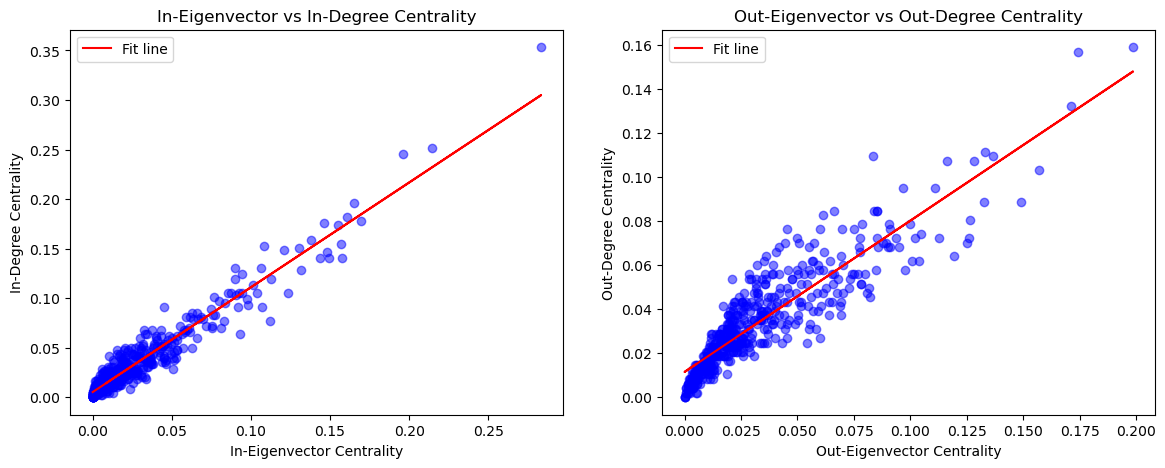

In [20]:
ineig_c_list = list(ineig_c.values())
outeig_c_list = list(outeig_c.values())

pearson_corr_in = pearsonr(ineig_c_list, indegree_c_list)
pearson_corr_out = pearsonr(outeig_c_list, outdegree_c_list)
print("Pearson correlation (In-Degree):", pearson_corr_in[0])
print("Pearson correlation (Out-Degree):", pearson_corr_out[0])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].scatter(ineig_c_list, indegree_c_list, alpha=0.5, c='blue')
slope, intercept = np.polyfit(ineig_c_list, indegree_c_list, 1)
axes[0].plot(ineig_c_list, slope * np.array(ineig_c_list) + intercept, color='red', label='Fit line')
axes[0].set_title(f"In-Eigenvector vs In-Degree Centrality")
axes[0].set_xlabel("In-Eigenvector Centrality")
axes[0].set_ylabel("In-Degree Centrality")
axes[0].legend()

axes[1].scatter(outeig_c_list, outdegree_c_list, alpha=0.5, c='blue')
slope, intercept = np.polyfit(outeig_c_list, outdegree_c_list, 1)
axes[1].plot(outeig_c_list, slope * np.array(outeig_c_list) + intercept, color='red', label='Fit line')
axes[1].set_title(f"Out-Eigenvector vs Out-Degree Centrality")
axes[1].set_xlabel("Out-Eigenvector Centrality")
axes[1].set_ylabel("Out-Degree Centrality")
axes[1].legend()
plt.show()

### 2.3.3. Conclusions

From the centrality analysis, we can conclude that artists with a higher number of connections also tend to act as bridges between different parts of the network, with this relationship being stronger for artists with high in-degree centrality. Additionally, artists with higher in-degree are frequently referenced by influential nodes, reinforcing that in-degree is strongly associated with influence in the network. Finally, artists with higher out-degree tend to connect to important nodes, indicating that active artists play a key role in maintaining the network’s structure.

## 2.4. Assortativity

Assortativity measures the tendency of nodes in a network to connect to other nodes that are similar, such as by degree or attribute.

### 2.4.1 Assortativity relative to degree

In the case of degree assortativity, it indicates whether high-degree nodes tend to connect with other high-degree nodes, being assortative, or with low-degree nodes, being disassortative. For this network, the assortativity value is very close to zero, meaning that connections are random with respect to degree, occurring without a preference for nodes with similar or dissimilar degree. This is not surprising given the context of the network, where both high-degree artists and low-degree artists most likely reference high degree artists, breaking any type of assortativity pattern.

In [21]:
G_und=G.to_undirected(reciprocal=False, as_view=False)
degree_assort=nx.degree_assortativity_coefficient(G_und)
print("Degree assortativity coefficient:", degree_assort)

Degree assortativity coefficient: -0.01941766166206628


### 2.4.2. Assortativity relative to length of content

The assortativity value with respect to length of content is also very close to zero, indicating that connections are essentially random regarding the number of words on an artist’s Wikipedia page. As discussed in Section 2.2, artists with longer pages tend to have higher in-degree and therefore be more influential. Therefore, this result is not surprising since both high-degree artists (with longer pages) and low-degree artists (with shorter pages) are likely to reference highly influential artists who have longer Wikipedia pages.

In [22]:
degree_assort_length=nx.attribute_assortativity_coefficient(G_und,"length_of_content")
degree_assort_length
print("Length of content assortativity coefficient:", degree_assort_length)

Length of content assortativity coefficient: -0.003299574863728513


# UNDER CONSTRUCTION

In [35]:
import pandas as pd
import networkx as nx
from backboning import high_salience_skeleton

G3=G_und.copy()

# Convert G3 to a pandas DataFrame
edges3 = nx.to_pandas_edgelist(G3)

# Rename columns and assign a weight of 1 to every edge
edges3.rename(columns={'source': 'src', 'target': 'trg'}, inplace=True)
edges3['nij'] = 1  # every edge has equal weight

# Extract the High-Salience Skeleton
#The skeleton keeps edges that are “structurally important,” removing redundant or weak connections.
skeleton3 = high_salience_skeleton(edges3)

Calculating HSS score...


c:\Users\Maria\anaconda3\envs\sgi\Lib\site-packages\networkx\drawing\nx_pylab.py:1438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


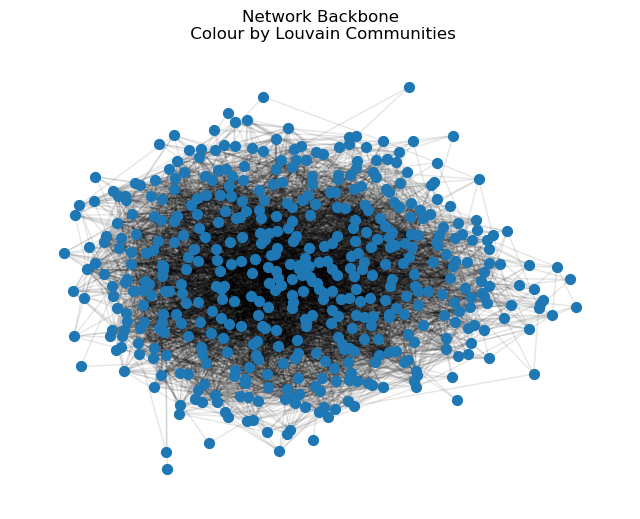

In [37]:
backbone_edges3 = backboning.thresholding(skeleton3, threshold=0.01)
G_backbone3 = nx.from_pandas_edgelist(backbone_edges3, source='src', target='trg', edge_attr='score')

pos_springf3 = nx.forceatlas2_layout(G_backbone3, max_iter=100, gravity=25)

plt.figure(figsize=(8, 6))
nodes = nx.draw_networkx_nodes(G_backbone3, pos=pos_springf3, node_size=50, cmap=plt.cm.plasma)
nx.draw_networkx_edges(G_backbone3, pos=pos_springf3, alpha=0.1)

plt.title("Network Backbone\n Colour by Louvain Communities")
plt.axis("off")
plt.show()

# **LIXO**

In [ ]:
#Neighbours pointing to
beatles_neigh=list(G.predecessors('the beatles'))
print(beatles_neigh[:10])

trs_neigh=list(G.predecessors('the rolling stones'))
print(trs_neigh[:10])

ledz_neigh=list(G.predecessors('led zeppelin'))
print(ledz_neigh[:10])

In [ ]:
#Neighbours they point to
alice_neigh=list(G.successors('alice in chains'))
print(alice_neigh[:10])

dp_neigh=list(G.successors('deep purple'))
print(dp_neigh[:10])

bs_neigh=list(G.successors('black sabbath'))
print(bs_neigh[:10])

In [ ]:
in_d = [d for _, d in G.in_degree()]
out_d = [d for _, d in G.out_degree()]

heatmap, xedges, yedges = np.histogram2d(in_d, out_d, bins=30, range=[[0, 30], [0, 30]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(in_d, out_d, marker='o', color='darkblue')
axes[0].set_title('Scatter Plot of In-Degree vs Out-Degree')
axes[0].set_xlabel('In-Degree')
axes[0].set_ylabel('Out-Degree')

im = axes[1].imshow(heatmap.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
axes[1].set_title('Heatmap of In-Degree vs Out-Degree (Zoomed to [0,30])')
axes[1].set_xlabel('In-Degree')
axes[1].set_ylabel('Out-Degree')
axes[1].set_xticks(np.arange(0, 31, 5))
axes[1].set_yticks(np.arange(0, 31, 5))
fig.colorbar(im, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

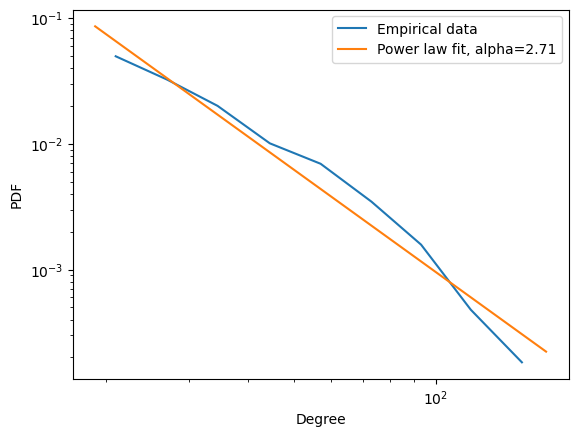

In [74]:
fit_in.plot_pdf(label='Empirical data')
fit_in.power_law.plot_pdf(label=f'Power law fit, alpha={alpha_in:.2f}')
plt.xlabel("Degree")
plt.ylabel("PDF")
plt.legend()
plt.show()

entre 2 e 3: scale free
maior que 3: hubs exist but less pronouced

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# empirical pdf
fit_in.plot_pdf(label='Data')

# fitted power-law
fit_in.power_law.plot_pdf(color='red', linestyle='--', label=f'Power-law fit (alpha={alpha_in:.2f})')

plt.axvline(fit_in.xmin, color='gray', linestyle='--', label=f'xmin = {fit_in.xmin}')

ax.set_xlabel('In-degree')
ax.set_ylabel('Probability')
ax.set_title('Log-Log In-Degree Distribution with Power-law Fit')
ax.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

# Log-normal parameters
mu_out = fit_out.lognormal.mu
sigma_out = fit_out.lognormal.sigma
print("Log-normal fit: mu =", mu_out, ", sigma =", sigma_out)

# Exponential parameters
lambda_exp_out = fit_out.exponential.parameter1
print("Exponential fit: lambda =", lambda_exp_out)

# Plot PDF comparison
fig, ax = plt.subplots(figsize=(8,6))
fit_out.plot_pdf(label='Data')
fit_out.power_law.plot_pdf(color='red', linestyle='--', label=f'Power-law (alpha={alpha_out:.2f})')
fit_out.lognormal.plot_pdf(color='green', linestyle=':', label='Log-normal')
fit_out.exponential.plot_pdf(color='orange', linestyle='-.', label='Exponential')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('In-degree')
ax.set_ylabel('Probability')
ax.set_title('Degree Distribution Fits')
ax.legend()
plt.show()

In [ ]:
import powerlaw
import matplotlib.pyplot as plt
import numpy as np

# Plot full empirical PDF manually
fit_in.plot_pdf(label='Tail data (≥ xmin)', color='blue')
fit_in.power_law.plot_pdf(color='red', linestyle='--', label='Power law fit')

# Add full empirical distribution (all data)
counts, bins = np.histogram(in_d, bins=np.arange(min(in_d), max(in_d)+2))
probs = counts / counts.sum()
plt.scatter(bins[:-1], probs, color='gray', alpha=0.5, label='All data (unfitted)')

plt.axvline(fit_in.xmin, color='black', linestyle=':', label=f'xmin = {fit_in.xmin:.0f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('In-degree')
plt.ylabel('Probability')
plt.title('Full vs Fitted In-Degree Distribution')
plt.legend()
plt.show()